In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
# pandas 에서 데이터 뽑고, 말뭉치를 뽑아보면 통으로 분석 못 하니까 형태소로 나누는데 나눈 거 중에
#의미 있는 게 서술어, 나 콜라 먹었다.
#뽑아 내는 거 - wordcloud, konlpy



1.1.1
1.18.5


In [3]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내 글자수를 50개로 두고, head tail
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [4]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."
2,AU000001,Bond University,"Bond대학교는 휴양지로 유명한 골드코스트에 위치해있습니다. 서퍼스 파라다이스, 브...",학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다. 학교에서 5분정도 걸어...,거주형태는 크게 On Campus와 Off Campus로 나뉩니다. 저는 기숙사에 ...,"수업은 보통 4개의 수업을 듣습니다. 저는 Chinese1, Australian p...",교환생활 중 국제교육부와 연락할 일은 없었습니다. 교환학생을 가서 따로 국제교육부와...,학기초에 동아리 박람회식으로 여러 동아리들의 부스가 세워집니다. 관심 있는 동아리에...,특별히 culture shock이라기 보다는 정말 다양한 문화를 접하는 것 자체가 ...,"수업관련해서는 교수님께 질문을 해도 친절하게 알려주시고, 또 교내에 과제나 발표준비...",Bond와 그 동네를 생각하면 여유롭고 평화로웠던 분위기가 아직도 생생해요. 여기서...


In [5]:
df_ranking_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_wrangled.csv", encoding="utf-8")
df_ranking_specific.head(7)

,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,AF000001,AFGHANISTAN,Kabul University,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000001,ARGENTINA,Universidad Blas Pascal,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AR000002,ARGENTINA,Universidad Catolica de Cordoba,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AR000003,ARGENTINA,Universidad de Palermo,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,AR000004,ARGENTINA,Universidad del Salvador,교환학생,ISEP,1.0,0.0,0.399670,0.00000,0.399670,0.119901,http://oia.yonsei.ac.kr/partner/expReport.asp?...
5,AR000005,ARGENTINA,University of Buenos Aires,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
6,AU000019,AUSTRALIA,Australian National University,교환학생,교환대학,27.0,17.0,17.952732,0.62963,0.664916,0.640216,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [6]:
df_ranking = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_ranking.csv", encoding="utf-8")
df_ranking.head(5)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,376,CH000004,SWITZERLAND,University of Lausanne,교환학생,교환대학ISEP,8.0,8.0,6.659102,1.000000,0.832388,0.949716,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.665700,1.000000,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,415,GB000010,UNITED KINGDOM,University of Edinburgh,교환학생방문학생SAP(정규),교환대학SAF,7.0,7.0,5.607286,1.000000,0.801041,0.940312,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,361,SE000003,SWEDEN,Kristianstad University,교환학생,교환대학,49.0,47.0,39.341540,0.959184,0.802889,0.912295,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,49,CA000003,CANADA,Dalhousie University,교환학생,교환대학,6.0,6.0,4.088647,1.000000,0.681441,0.904432,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [7]:
df_ranking['국가'].value_counts()

UNITED STATES         116
JAPAN                  23
CANADA                 17
NETHERLANDS            14
AUSTRALIA              13
UNITED KINGDOM         13
FRANCE                 12
GERMANY                11
CHINA                  10
SPAIN                   7
SWEDEN                  6
AUSTRIA                 6
ITALY                   5
NEW ZEALAND             5
HONG KONG               5
TAIWAN                  4
FINLAND                 4
SINGAPORE               3
RUSSIAN FEDERATION      3
SWITZERLAND             3
NORWAY                  2
THAILAND                2
DENMARK                 2
IRELAND                 2
CZECH REPUBLIC          1
TURKEY                  1
POLAND                  1
MEXICO                  1
BELGIUM                 1
LITHUANIA               1
ISRAEL                  1
Name: 국가, dtype: int64

In [8]:
df_ranking.shape

(295, 13)

In [9]:
sample_index=0

In [10]:
sample_univ = df_ranking.loc[sample_index, '대학명']
sample_univ

'University of Lausanne'

In [11]:
sample_univ = df_ranking.loc[sample_index, '국가']
sample_univ

'SWITZERLAND'

In [12]:
df_ranking.loc[(df_ranking['국가'] == 'MEXICO')]

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.6657,1.0,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [13]:
df_ranking_sw = df_ranking.loc[(df_ranking['국가'] == 'SWITZERLAND')]
print(df_ranking_sw.shape)

(3, 13)


In [14]:
df_ranking.columns.to_list()

['index',
 '대학코드',
 '국가',
 '대학명',
 '파견구분',
 '협정형태',
 'NUM_VISITS',
 'BERT_SUM',
 'RNN_SUM',
 'BERT_AVG',
 'RNN_AVG',
 'BERT_PLUS_RNN_SCORE',
 'COLLEGE_LINK']

In [15]:
df_specific.shape #specific은 왜? 제목은 abstract, specific 은 말뭉치. shape은 대학의 개수.

(470, 11)

In [16]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [17]:
df_specific.isnull().sum()

대학코드            0
대학명             0
gen_info        0
env_info        1
food_info       2
study_info      0
office_info     8
facil_info      3
mhct_info      15
help_info      17
etc_info       16
dtype: int64

In [18]:
df_column = df_specific.fillna("")
df_column.head()

대학코드                              대학명  \
0  AR000004         Universidad del Salvador   
1  AU000019   Australian National University   
2  AU000001                  Bond University   
3  AU000002                Curtin University   
4  AU000003  Curtin University of Technology   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [19]:
df_column.isnull().sum()

대학코드           0
대학명            0
gen_info       0
env_info       0
food_info      0
study_info     0
office_info    0
facil_info     0
mhct_info      0
help_info      0
etc_info       0
dtype: int64

In [19]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "") #slash n 이 엔터, 쓸데 없는 걸 없애는 거
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # 한글, -english 빼고 전부 날리기
    # regex, regular expression, 특정 글자수 규칙 지정, 말고는 다 날림
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', str_data)
    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split()) #멀티플 스페이스를 싱글로 바꿈
    return str_data

In [20]:
food_data = "food_info" #변수로 저장. 그래야 한 environment info를 제너럴로 바꿀 수 있음
univ_code = "MX000004"

In [21]:
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info 

In [22]:
str_example = access_univ_info(df_specific, food_data, univ_code)
str_example[:500] #뭔가 많이 잘못됨; BERT score왜 이렇게 나온 것인지 조사 필요함- sentiment analysis 성능평가. NUM_Visits only 7.

'저는 기숙사에서 운 좋게 묵게 되었는데 멕시코에 도착하기 전까지는 거주지가 없는 상태였습니다 다행히도 같은 단과대 소속 친구와 가게 되어 거주지를 구하기 전까지 호텔에서 묵었는데 그 시기는 꽤나 힘들었습니다 그쪽 학교 국제처에서는 더이상 기숙사가 없다고 하고 가기 전에 메일 문의로 했을 때에는 개인적으로 거주지를 구하더라도 무조건 직접 집을 보고 계약을 하라고 했지만 정작 도착했을 때에 개인적으로 구할 수 있는 집은 거의 다 나간 상태였고 기숙사도 방이 없다고 하더라고요 그래도 친구랑 기숙사 사무실을 찾아가자고 했는데 다행히도 취소 된 방이 몇개 있어서 그날 바로 신청을 했습니다 다른 학교 한국학생들에게 나중에 물어보니 그들은 한국에서 미리 개인 집들을 계약을 하고 왔다고 하더라고요 저는 이인실에 운 좋게 혼자 쓰게 되었는데 너무 만족했습니다 기숙사 종류도 다양하고 방에 따라 금액도 다양한데 미리 홈페이지에서 자신에게 맞을 것 같은 방을 선택해서 미리 연락 및 신 어느 지역에 살든 '

In [23]:
# collecting all column values into one string 여러개의 카테고리별 후기를 하나로 대학으로
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [24]:
# collecting all column values into one string
food_corpus = column_to_string(df_specific, food_data)
print("글자수:", len(food_corpus))
food_corpus[:1000]

글자수: 4825455


'기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다 홈스테이 혹은 게스트 하우스 혹은 학생레지던스 홈스테이를 하는 경우 홈스테이 가족에서 아침과 저녁식사를 제공하고 점심식사는 나가서 사먹어야 한다 가족에 따라 집에서 요리를 할 수 있는 경우가 있고 할 수 없는 경우가 있다 그리고 홈스테이는 아르헨티나 사람들에 대해서 잘 알 수 있는 기회가 될 수 있지만 본인의 친구들 중 몇몇은 안좋은 가족들이 걸려서 집에서 불편했었다고 한다 본인은 학생 레지던스에서 살았었다 인 실이 아니라 방별로 인 실 인 실 인 실 이 있었고 화장실과 부엌은 대부분 같이 사용했다 레지던스 별로 인 실도 있고 개인화장실이 있는 경우도 있다 대부분 부엌은 공동사용이다 본인이 있었던 곳에는 한국사람이 하나도 없고 거의 다 스페인어권 사람이어서 스페인어를 배우기에 좋았고 또 남아메리카 중앙아메리카 여러 나라들의 사람들 음식 등등을 알 수 있게 되어서 정말로 뜻깊은 경험이 There are many housing options but I chose to stay in Wamburun Hall At first I was put off as Wamburun Hall is a bit far away mins by walking from Civic the city center but I managed to always get a lift from my Aussie friends who owe a car You have a single room to yourself with a bed a wardrobe desk a sink your own fridge which is a luxury and lots of cupboards to organize things However the toilet bathroom are shared Wamburun is a self catered hall which means that y 보통 기숙사에 거주합니다 쉐어하우스를 구해서 사는 친구들도 있었지만 기숙사보다 전혀 저렴

## Tokenizing with soynlp

In [25]:
# https://github.com/lovit/soynlp 문장을 쪼개는 방식. 쪼개진 거의 예시가 
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [26]:
tokenized_food = tokenizer.tokenize(food_corpus)
tokenized_food[:30]

['기숙사는',
 '학교에서',
 '제공하지',
 '않고',
 '두가지',
 '옵션이',
 '주어진다',
 '홈스테이',
 '혹은',
 '게스트',
 '하우스',
 '혹은',
 '학생레지던스',
 '홈스테이를',
 '하는',
 '경우',
 '홈스테이',
 '가족에서',
 '아침과',
 '저녁식사를',
 '제공하고',
 '점심식사는',
 '나가서',
 '사먹어야',
 '한다',
 '가족에',
 '따라',
 '집에서',
 '요리를',
 '할']

In [27]:
from collections import Counter

In [28]:
print(len(tokenized_food)) 

1194953


In [29]:
tokenized_food_counted = Counter(tokenized_food)
print("no. food words:", len(tokenized_food_counted))
common_food_words = tokenized_food_counted.most_common(10)
common_food_words

no. food words: 113301


[('수', 13101),
 ('있습니다', 8418),
 ('저는', 8371),
 ('있는', 8117),
 ('기숙사', 7906),
 ('때문에', 6635),
 ('한', 5604),
 ('에', 5414),
 ('학교', 5297),
 ('이', 4453)]

In [59]:
stopwords_kr = ['으로', '에서', '있는', '하는', '하고', '있습니다', '그리고','편입니다','아주','곳에','않습니다','좋습니다','않았습니다',
                '입니다', '어느', '하는데', '대체', '있으면', '최근', '좋은','은','있는데','주로',
                '라고', '봅니다', '해야', '있다고', '이라는', '합니다', '조금','굉장히','있으며','것이','갈','자주',
                '경우', '가능한', '하지만', '또한', '처럼', '있어', '보다', '꽤', '상당히',
                '되어', '이미', '그러나', '이루어지고', '이라', '위해', '되면', '와','를', '가지고',
                '이런', '까지', '하여', '우리', '어떤', '에게', '있지만', '해주는', '바로', '내내', '것을', '크게',
                '정도', '또는', '부터', '대해', '모든', '하기', '어떻게', '같습니다', 
                '이라고', '에는', '때문', '되고', '됩니다', '통해', '있을', '결국', '않은','훨씬','같아요','정도의','같습니다','버스를',
                '이를', '특히', '있도록', '대한', '가장', '이나', '에서는', '있고', 
                '같은', '에서도', '아닌', '다른', '따라', '되어야', '한다고', '다만', '볼','도','다'
                '이러한','해서', '관련', '생각', '하지', '않을까요', '약간', '되는', '했습니다','기숙사를','기숙사에','기숙사는','기숙사가','기숙사에서','있었습니다','대부분의',
                '에선', '라는', '물론', '않을까', '하면', '아니라', '말씀', '에도', '보통',
                '아니라', '부분', '분야', '많은', '여러', '향후', '기반', '행차', '할', '있어서',
                '그러면서', '되지만', '현재', '제가', '저는', '너무', '작은','ity','의','거의','정도로',
                '정말','그들','여타','없으므','완전','몇몇','만약','게다','이후','우선',
                '시쯤','후반','더욱','원하는','많을','몇개','분명','두어개', '하므', '수밖',
                '이','있','하','것','들','되','수','이','보','않','없','나','사람','주','아니','등','같',
                '우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그',
                '그것','두','말하','알','받','못하','일','에','4','10','5', '8','6','9','7','nn','대부분', '오는','꼭'
                '그런','또','문제','더','사회', '는','많이','n','1','2','3','있다','분','나는',
                '많','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하','내가','비교적',
                '그러','속','하나','살','모르','적','월','데','자신','안','어떤','내','경우','을','인','방','모두',
                '명','그녀','다시','이런','앞','보이','번','다른','어떻','여자','개','전','들',
                '주변에는','없습니다','다','t','앞서','곳이','타고','있기','많고','곳은','자체가','학','약','없다',
                '사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','큰','매우','때문에'] 

In [60]:
keywords = []
for n in tokenized_food: 
    if n not in stopwords_kr: 
        keywords.append(n)

In [61]:
common_keywords = Counter(keywords)
common_key_words = common_keywords.most_common(50)
common_key_words

[('기숙사', 7906),
 ('학교', 5297),
 ('e', 3486),
 ('같이', 3145),
 ('방을', 3076),
 ('사는', 2917),
 ('함께', 2645),
 ('Hall', 2389),
 ('식사는', 2378),
 ('학교에서', 2204),
 ('집을', 2201),
 ('학생들이', 2035),
 ('hous', 1990),
 ('살았습니다', 1981),
 ('campus', 1962),
 ('명이', 1955),
 ('화장실', 1834),
 ('직접', 1772),
 ('방이', 1722),
 ('Hous', 1684),
 ('plan', 1497),
 ('개의', 1496),
 ('따로', 1494),
 ('수도', 1478),
 ('아파트', 1448),
 ('각', 1431),
 ('meal', 1426),
 ('학기', 1419),
 ('다양한', 1417),
 ('캠퍼스', 1389),
 ('로', 1360),
 ('방은', 1316),
 ('요리를', 1312),
 ('친구들과', 1303),
 ('hall', 1276),
 ('먹을', 1215),
 ('I', 1198),
 ('음식을', 1167),
 ('시설이', 1126),
 ('집에서', 1120),
 ('층에', 1120),
 ('교환학생들은', 1111),
 ('쓰는', 1087),
 ('학생들은', 1067),
 ('있다는', 1066),
 ('경우는', 1057),
 ('ing', 1042),
 ('교환학생', 1032),
 ('혼자', 1031),
 ('경우에는', 1029)]

In [62]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath, colormap= "Reds",
                        stopwords = set(stopwords_kr), 
                        background_color = backgroundcolor, 
                        max_words= 200,
                        max_font_size= 150,
                        width = width, 
                        height = height)

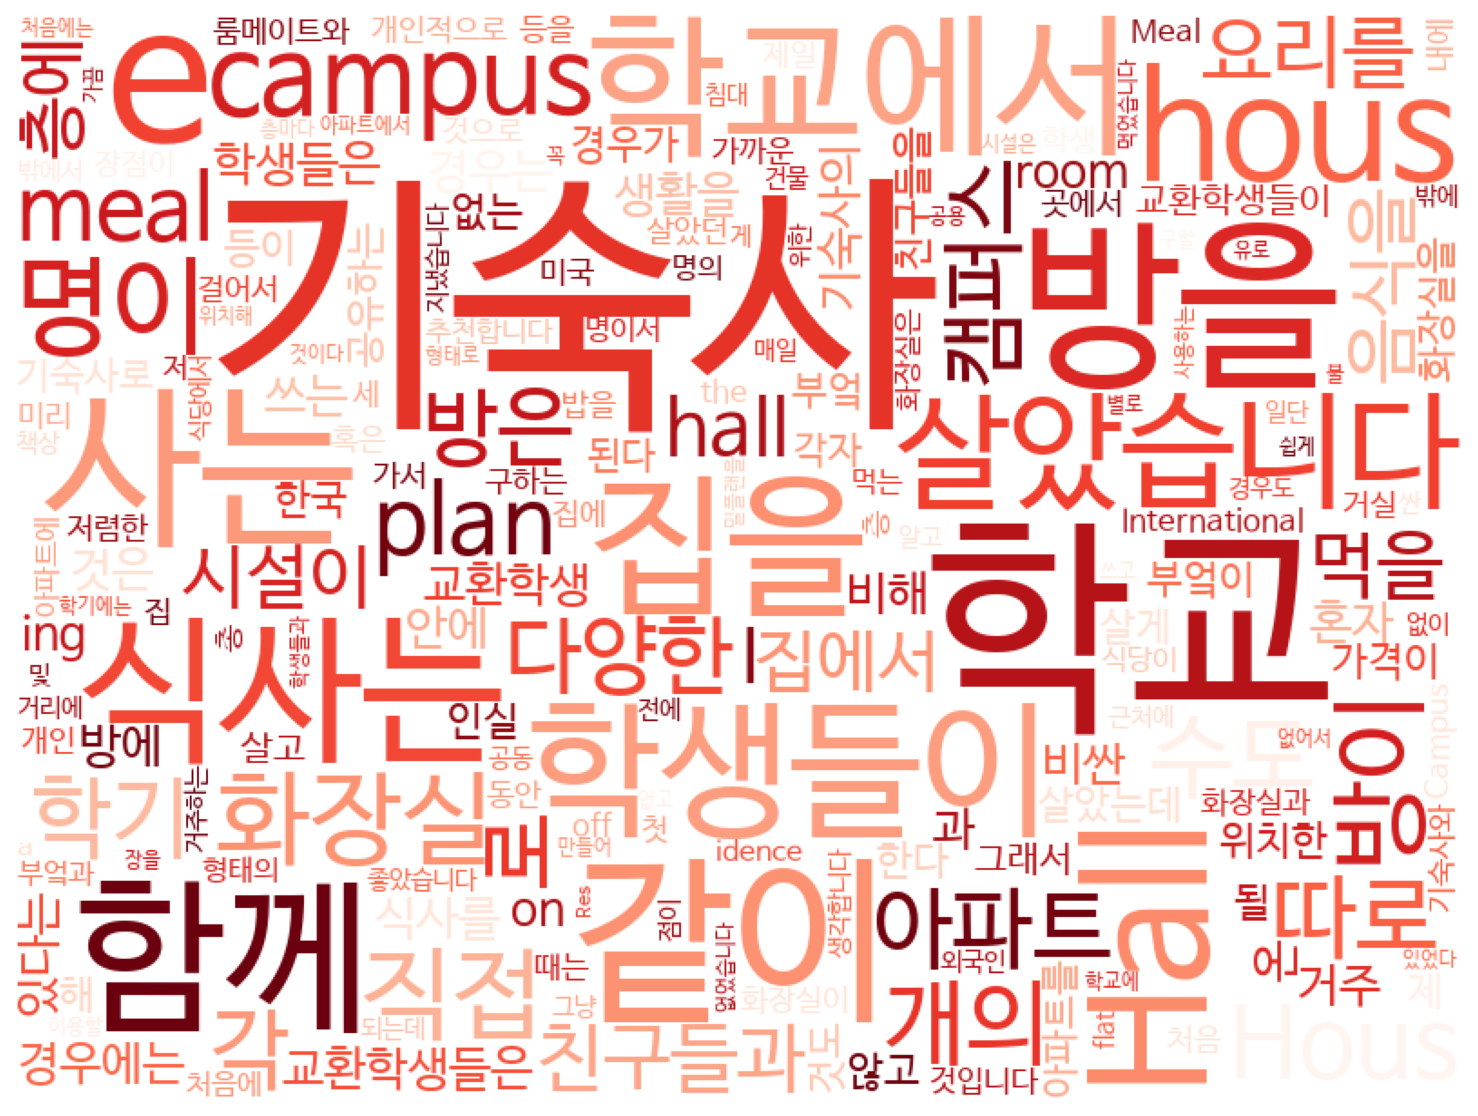

In [65]:
wordcloud.generate_from_frequencies(frequencies = common_keywords) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#이래서 전체 스탑워드 뽑은 다음에 각 학교에서 유니크한 거만 정리하는 식으로 하는 거..? 
#아니면 그냥 좋은 거에 대한 대학 0이랑 1 나눠서 그 대학들 키워드만 모아서 알아보기 그 때 그 때 스탑워드 처리.

In [67]:
word_list, frequency_list = map(list, zip(*common_food_words))
word_list[:10]

['수', '있습니다', '저는', '있는', '기숙사', '때문에', '한', '에', '학교', '이']

In [68]:
# https://github.com/lovit/soynlp
from soynlp.noun import LRNounExtractor

In [69]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(keywords)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (30973, 16082) tokens
[Noun Extractor] building L-R graph was done000 / 905185 sents
[Noun Extractor] 5072 nouns are extracted


In [70]:
nouns_counted = Counter(nouns)
print("no. gen words:", len(nouns_counted))
common_nouns = nouns_counted.most_common(100)
common_nouns #왜 숫자가 적고 정확도는 높은지

no. gen words: 5072


[('기숙사',
  NounScore_v1(frequency=14001, score=0.731275706571129, known_r_ratio=0.6579280211567207)),
 ('학교',
  NounScore_v1(frequency=8086, score=0.9235430514619875, known_r_ratio=0.8559986651092941)),
 ('학생들',
  NounScore_v1(frequency=5498, score=0.9231776565530961, known_r_ratio=0.9679826673086181)),
 ('화장실',
  NounScore_v1(frequency=5345, score=0.5704073994830557, known_r_ratio=0.9880817253121453)),
 ('아파트',
  NounScore_v1(frequency=4972, score=0.7590353895950339, known_r_ratio=0.8656601842374616)),
 ('생활',
  NounScore_v1(frequency=4920, score=0.8258228131401453, known_r_ratio=0.8320515485346082)),
 ('거주',
  NounScore_v1(frequency=4118, score=0.8738048077972707, known_r_ratio=0.6474003028773346)),
 ('친구들',
  NounScore_v1(frequency=4052, score=0.8400503920403919, known_r_ratio=0.9595326303790254)),
 ('교환',
  NounScore_v1(frequency=4030, score=0.5374912651933701, known_r_ratio=0.026962609861462834)),
 ('형태',
  NounScore_v1(frequency=3867, score=0.5788159256444149, known_r_ratio=0.848

In [76]:
noun_extractor.lrgraph.get_r('한국')

[('', 894),
 ('에서', 483),
 ('인', 310),
 ('에', 169),
 ('의', 162),
 ('보다', 152),
 ('과', 136),
 ('음식을', 118),
 ('인이', 61),
 ('음식이', 59)]

In [77]:
noun_extractor.lrgraph.get_l('식당')

[('학생', 67),
 ('학교', 29),
 ('한', 9),
 ('학', 7),
 ('기숙사', 6),
 ('구내', 6),
 ('교내', 5),
 ('한인', 4),
 ('한국', 2),
 ('중', 2)]

In [78]:
from soynlp.noun import LRNounExtractor_v2

noun_extractor = LRNounExtractor_v2(verbose=True)
#noun_extractor.train(sents)
#nouns = noun_extractor.extract()
nouns_eo = noun_extractor.train_extract(keywords)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 113032 from 905185 sents. mem=0.560 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=905181, mem=0.683 Gb
[Noun Extractor] batch prediction was completed for 29706 words
[Noun Extractor] checked compounds. discovered 10663 compounds
[Noun Extractor] postprocessing detaching_features : 20226 -> 15590
[Noun Extractor] postprocessing ignore_features : 15590 -> 15438
[Noun Extractor] postprocessing ignore_NJ : 15438 -> 15137
[Noun Extractor] 15137 nouns (10663 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.706 Gb                    
[Noun Extractor] 65.11 % eojeols are covered


In [83]:
list(noun_extractor._compounds_components.items())[:50]

[('호주한인사이트', ('호주', '한인사이트')),
 ('정부주택보조금', ('정부', '주택보조금')),
 ('오르락내리락해야', ('오르락내리락', '해야')),
 ('하우징코디네이터', ('하우징', '코디네이터')),
 ('튀김야채샌드위치라고', ('튀김', '야채', '샌드위치', '라고')),
 ('거주형태미국인들', ('거주형태', '미국인들')),
 ('히요시인터내셔널', ('히요시', '인터내셔널')),
 ('게이오운동부학생들', ('게이오', '운동부', '학생들')),
 ('교토대학국제교류회관', ('교토대학', '국제교류회관')),
 ('학부교환학생', ('학부', '교환학생')),
 ('남자유학생기숙사', ('남자', '유학생기숙사')),
 ('오오이즈미가쿠엔역에', ('오오이즈미가쿠엔', '역에')),
 ('와세다대학유학생기숙', ('와세다대학', '유학생', '기숙')),
 ('기숙사학생자치단체', ('기숙사', '학생자치단체')),
 ('사립국제학생기숙사', ('사립', '국제학생기숙사')),
 ('미리미리하셔야', ('미리', '미리', '하셔야')),
 ('마스트리히트하우징', ('마스트리히트', '하우징')),
 ('모스크바국립대학', ('모스크바', '국립대학')),
 ('독일온라인한국식품점', ('독일', '온라인', '한국식품점')),
 ('에버그린서비스아파트', ('에버그린', '서비스', '아파트')),
 ('어퍼웨스트사이드', ('어퍼웨스트', '사이드')),
 ('딜리버리주문', ('딜리버리', '주문')),
 ('여자전용기숙사', ('여자', '전용기숙사')),
 ('한인커뮤니티사이트', ('한인커뮤니티', '사이트')),
 ('미국인포털사이트', ('미국인', '포털사이트')),
 ('슈메이커사우스', ('슈메이커', '사우스')),
 ('기숙사관리부서', ('기숙사', '관리', '부서')),
 ('왔다갔다하는것', ('왔다갔다', '하는것')),
 ('학교아파트신청', ('학교아파트', '신청')),
 

In [81]:
print((nouns['마트'])) 

NounScore_v1(frequency=929, score=0.8624026007905139, known_r_ratio=0.9290085679314566)


In [ ]:
%time df_tokens = df_column.apply(tokenizer.tokenize)